In [2]:
from DLtools.Data import instant_data,station_sel
from DLtools.feature_sel import *

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

# Loading Data 

In [3]:
###### SETTING AREA ################
loading = instant_data()
df,mode = loading.hourly_instant(),'hour'
# df,mode = loading.daily_instant(),'day'
if mode =='hour': n_past,n_future = 24*7,72
elif mode =='day': n_past,n_future = 60,30

st = 'CPY012'
target,start_p,stop_p,host_path=station_sel(st,mode)

save_path = host_path

<AxesSubplot:xlabel='date'>

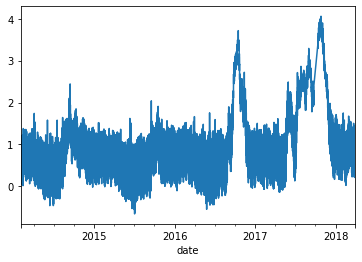

In [4]:
df = df[start_p:stop_p]
data = df

data['Day'] = data.index.dayofyear #add day
data = data.interpolate(limit=300000000,limit_direction='both').astype('float32')#interpolate neighbor first, for rest NA fill with mean() #.apply(lambda x: x.fillna(x.mean()),axis=0)
data[target].plot()


In [5]:
data_mar = call_mar(data,target,mode,cutoff=0.2)

# Check Corr

<AxesSubplot:>

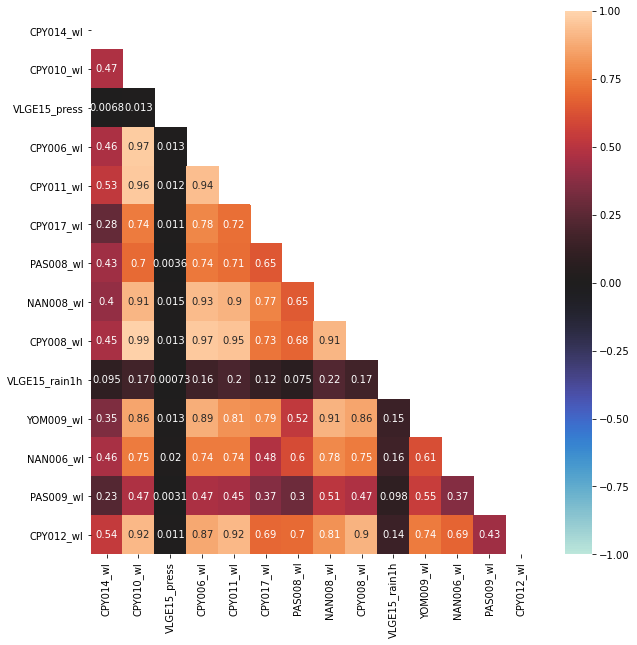

In [6]:
plt.subplots(figsize=(10,10))
mask = np.triu(data_mar.corr())
sns.heatmap(data_mar.corr(), annot = True, vmin=-1, vmax=1, center= 0,mask=mask)

# PCA analysis

In [34]:
# x = data_mar.drop([target],axis=1)
x = scale(data_mar)

covar_matrix = PCA(n_components = x.shape[1])
covar_matrix.fit(x.T)

PCA(n_components=14)

In [1]:
# print(covar_matrix.components_)
# # print(covar_matrix.explained_variance_)


In [35]:
PC_transform = covar_matrix.transform(x.T)
####################
pc_col = []
for i in range (PC_transform.shape[1]):
  pc_col.append('component_'+str(i+1))
#########################
principalDf = pd.DataFrame(data = PC_transform, columns = pc_col)

finalDf = pd.concat([principalDf, pd.Series(data.columns.T)],axis=1)
finalDf.set_index(0).to_csv('MAR/pca_hour_excludeTarget.csv')
finalDf.set_index(0)

,component_1,component_2,component_3,component_4,component_5,component_6,component_7,component_8,component_9,component_10,component_11,component_12,component_13,component_14
0,,,,,,,,,,,,,,
BKK001_wl,-15.524920,0.988687,35.702793,2.551597,-70.343567,63.790440,52.223778,23.164375,-3.935355,-8.210749,4.720816,0.328033,-0.110636,0.000018
BKK002_wl,-29.881912,-8.392984,-43.135696,-37.495628,76.951477,-22.827560,43.263004,36.133575,-13.820874,5.033388,-0.136695,0.293395,0.118279,0.000053
BKK003_wl,-53.695671,-5.820170,-6.799822,-16.121162,-6.608657,-4.513232,-5.797234,-23.830034,-14.883905,-8.035016,-3.613666,22.844004,-1.716051,0.000038
BKK004_wl,135.258286,147.481445,2.254605,-43.904091,1.899011,-0.025185,-8.679236,-1.564518,-0.105629,-2.118974,0.106985,0.324660,0.001179,-0.000085
BKK005_wl,-19.728596,-23.309328,42.739071,-21.217386,74.182182,79.492317,-12.089278,-24.378065,8.796721,-3.242295,1.425795,-3.908610,-0.011008,0.000015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
YOM009_rain1h,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
YOM010_rain1h,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
YOM011_rain1h,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


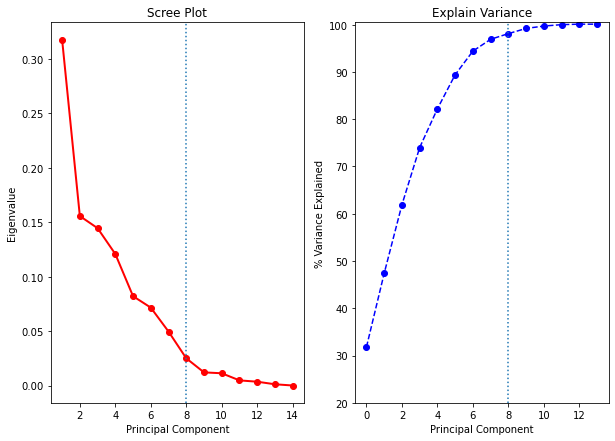

In [36]:
fig,ax = plt.subplots(1,2, figsize=(10,7))
##########################################
PC_values = np.arange(covar_matrix.n_components_) + 1
ax[0].plot(PC_values, covar_matrix.explained_variance_ratio_, 'ro-', linewidth=2)
ax[0].set_title('Scree Plot')
ax[0].set_xlabel('Principal Component')
ax[0].set_ylabel('Eigenvalue')


########################################
variance = covar_matrix.explained_variance_ratio_
var=np.cumsum(np.round(covar_matrix.explained_variance_ratio_, decimals=3)*100)
ax[1].set_ylabel('% Variance Explained')
ax[1].set_xlabel('Principal Component')
ax[1].set_title('Explain Variance')
ax[1].set_ylim(20,100.5)
ax[1].plot(var,'--bo')

#####################################
ax[0].axvline(8,linestyle=':')
ax[1].axvline(8,linestyle=':')
plt.savefig('MAR/PCA_analysis_excludeTarget.png', dpi=300, bbox_inches='tight')

# Actual PCA in ANN


In [21]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler

scaler_MM = MinMaxScaler()
scaler_Std = StandardScaler()

df_MMscaled = pd.DataFrame(scaler_MM.fit_transform(data_mar), columns=data_mar.columns,index=data_mar.index)
df_Stdscaled = pd.DataFrame(scaler_Std.fit_transform(data_mar), columns=data_mar.columns,index=data_mar.index)

split_date = '2017-01-01'
train,test = df_Stdscaled[:split_date],df_Stdscaled[split_date:]

In [17]:
def pca_check(input,name,line=3):
    covar_matrix = PCA(n_components = input.shape[1])
    covar_matrix.fit(input.T)

    PC_transform = covar_matrix.transform(input.T)
    ####################
    pc_col = []
    for i in range (PC_transform.shape[1]):
        pc_col.append('component_'+str(i+1))
    #########################
    principalDf = pd.DataFrame(data = PC_transform, columns = pc_col)

    finalDf = pd.concat([principalDf, pd.Series(input.columns.T)],axis=1)
    finalDf.set_index(0).to_csv('MAR/PCA_{}.csv'.format(name))
    finalDf.set_index(0)
    fig,ax = plt.subplots(1,2, figsize=(10,7))
    
    ##########################################
    PC_values = np.arange(covar_matrix.n_components_) + 1
    ax[0].plot(PC_values, covar_matrix.explained_variance_ratio_, 'ro-', linewidth=2)
    ax[0].set_title('Scree Plot')
    ax[0].set_xlabel('Principal Component')
    ax[0].set_ylabel('Eigenvalue')

    ########################################
    variance = covar_matrix.explained_variance_ratio_
    var=np.cumsum(np.round(covar_matrix.explained_variance_ratio_, decimals=3)*100)
    ax[1].set_ylabel('% Variance Explained')
    ax[1].set_xlabel('Principal Component')
    ax[1].set_title('Explain Variance')
    ax[1].set_ylim(20,100.5)
    ax[1].plot(var,'--bo')

    #####################################
    ax[0].axvline(line,linestyle=':')
    ax[1].axvline(line,linestyle=':')
    plt.savefig('MAR/PCA_{}.png'.format(name), dpi=300, bbox_inches='tight')

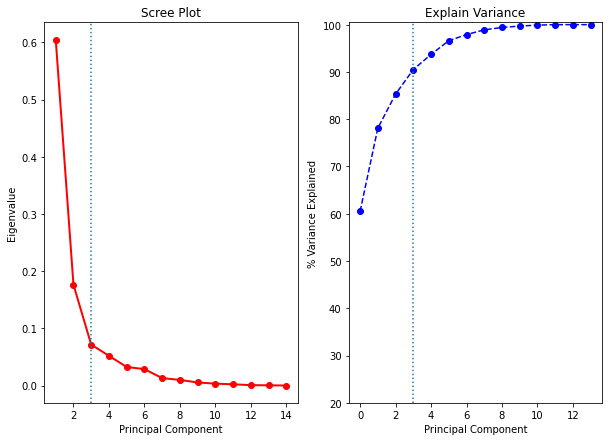

In [18]:
pca_check(df_MMscaled,'MinMax_all')

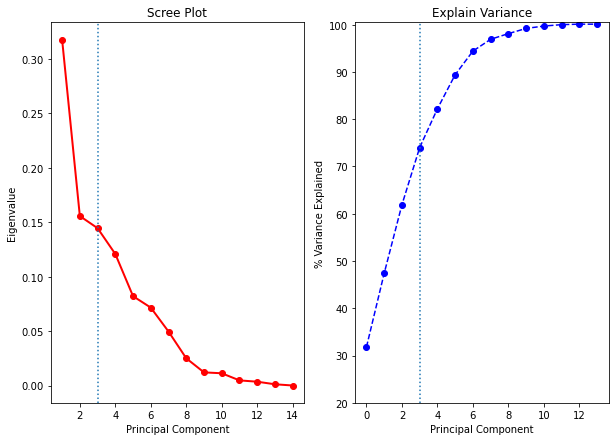

In [19]:
pca_check(df_Stdscaled,'Std_all')

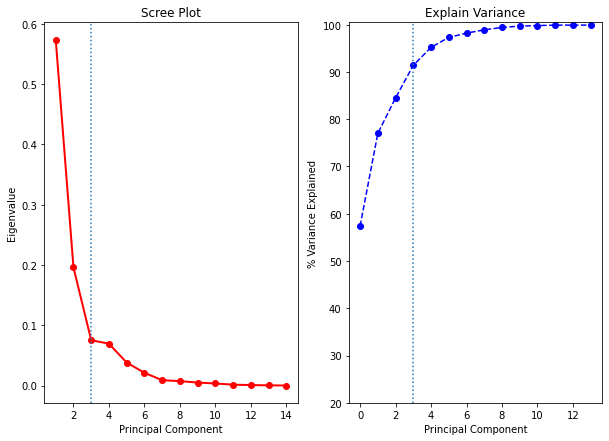

In [20]:
pca_check(train,'MinMax_train')

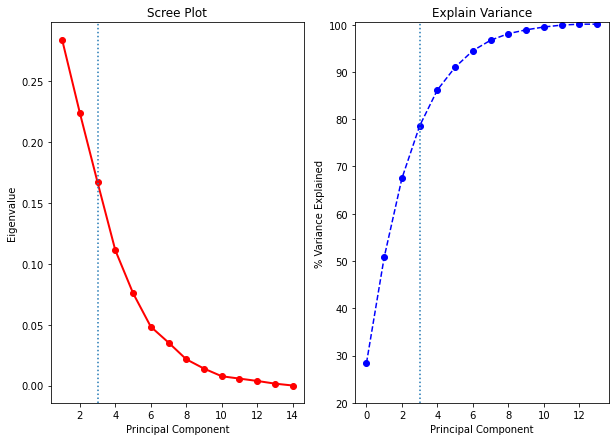

In [22]:
pca_check(train,'Std_train')